In [1]:
# Importing required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [3]:
# Loading dataset
df = pd.read_csv("/content/Groceries_dataset (1).csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [6]:
# Randomly drop 8000 values from the dataset
df = df.sample(n=df.shape[0] - 8000, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df['itemDescription'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


167

In [8]:
x= df['itemDescription'].value_counts().sort_values(ascending=False)[:10]
x


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk          1997
other vegetables    1534
rolls/buns          1361
soda                1197
yogurt              1042
root vegetables      838
tropical fruit       809
sausage              736
bottled water        734
citrus fruit         648
Name: itemDescription, dtype: int64

In [9]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
# Converting the transactions into lists

transactions = []
for i in range(df.shape[0]):
    transaction = []
    for j in range(df.shape[1]):
        if pd.notna(df.iloc[i,j]):
            transaction.append(df.iloc[i,j])
    transactions.append(transaction)
    print(transaction)
# transactions=[]
# for index,row in df.iterrows():
#     transactions.append(row.dropna().tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
[2564, '12-05-2015', 'frozen dessert']
[2065, '20-10-2014', 'soda']
[2413, '18-01-2014', 'whole milk']
[3284, '04-01-2014', 'yogurt']
[1499, '06-03-2015', 'rolls/buns']
[1510, '03-12-2014', 'beef']
[2553, '21-06-2015', 'other vegetables']
[3475, '10-06-2015', 'misc. beverages']
[1004, '01-05-2014', 'cling film/bags']
[4776, '08-08-2015', 'pork']
[4106, '25-08-2015', 'rolls/buns']
[1285, '27-10-2014', 'pastry']
[2492, '14-03-2014', 'shopping bags']
[4696, '03-10-2014', 'oil']
[1324, '26-03-2015', 'processed cheese']
[3960, '15-02-2014', 'root vegetables']
[2459, '16-09-2015', 'soda']
[2265, '29-07-2015', 'other vegetables']
[1796, '03-11-2015', 'yogurt']
[1835, '08-07-2014', 'rice']
[3413, '02-08-2014', 'frankfurter']
[4986, '08-02-2014', 'chewing gum']
[2402, '29-09-2014', 'cream cheese ']
[4220, '05-05-2014', 'rolls/buns']
[1087, '19-03-2015', 'chocolate']
[2747, '30-08-2015', 'curd']
[3255, '05-11-2015', 'tropical fruit']
[2745, '27-

In [11]:
# creating a new column: quantity
df['Quantity']=1
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Quantity
22400,1449,03-10-2015,tropical fruit,1
38462,3010,13-06-2014,hygiene articles,1
36986,4789,09-04-2015,specialty cheese,1
2182,1884,11-12-2015,frankfurter,1
32319,1997,28-12-2015,pastry,1


In [12]:
# encoding the transaction to binary
encoded = pd.get_dummies(pd.DataFrame(transactions).stack()).sum(level=0)
transactionsdf=(encoded>0).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-d5c839e15eb4>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded = pd.get_dummies(pd.DataFrame(transactions).stack()).sum(level=0)


In [13]:
# Creating threads
apicompleted= threading.Event()
fpcompleted= threading.Event()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#initializing execution time
exetime=[0,0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Algorithm Implementation:

In [15]:
# Defining function to run threads
def runapi():
    stime=time.time()
    apiresults = apriori(transactionsdf, min_support=min_support, use_colnames=True)
    exetime[0]=time.time()-stime
    apicompleted.set()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def runfp():
    stime=time.time()
    fpresults = fpgrowth(transactionsdf, min_support=min_support, use_colnames=True)
    exetime[1]=time.time()-stime
    fpcompleted.set()

#colunames=True gives item name in place for columns otherwise it shows as numericals

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Function to mine association rules from frequent itemsets
def mine_association_rules(itemsets, min_confidence):
    rules = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Allowing user to set minimum support and confidence
if __name__ == "__main__":
    min_support = float(input("Enter the minimum support: "))
    min_confidence = float(input("Enter the minimum confidence: "))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the minimum support: 0.01
Enter the minimum confidence: 0.3


### Parallel Execution:

In [18]:
# Create threads for FP-growth and Apriori algorithms
apithread = threading.Thread(target=runapi)
fpthread = threading.Thread(target=runfp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Start the threads
apithread.start()
fpthread.start()
apicompleted.wait()
fpcompleted.wait()

# Wait for both threads to finish
apithread.join()
fpthread.join()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Data Visualization and Recommendation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


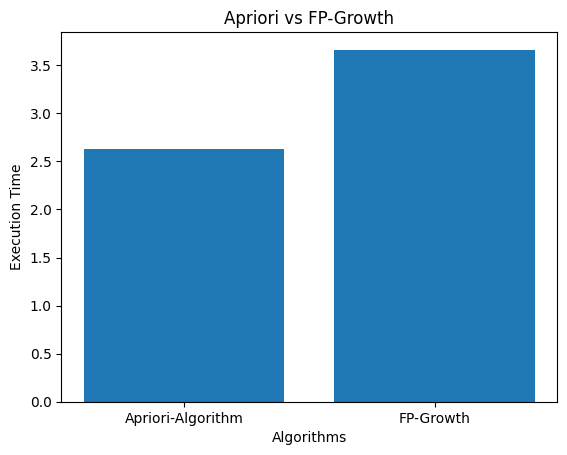

Apriori is Faster, hence it is recommended to be used


In [20]:
# Plotting to see the execution time comparision
algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel("Algorithms")
plt.ylabel("Execution Time")
plt.title('Apriori vs FP-Growth')
plt.show()
if exetime[0]<exetime[1]:
    print("Apriori is Faster, hence it is recommended to be used")
elif exetime[0]>exetime[1]:
    print("FP Growth is Faster, hence it is recommended to be used")
else:
    print("Both are equal, any algorithm can be used")

#### From the above visualization, it can be infered that Apriori performs better on this dataset than FP-growth.
- There are many reasons for this to happen, ranging from the environment, memory-usage, hardware, minimum thresholds, etc.
- Apriori usually performs poorer with huge datasets, the results are contradictory for our dataset